# Linear Models

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [4]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

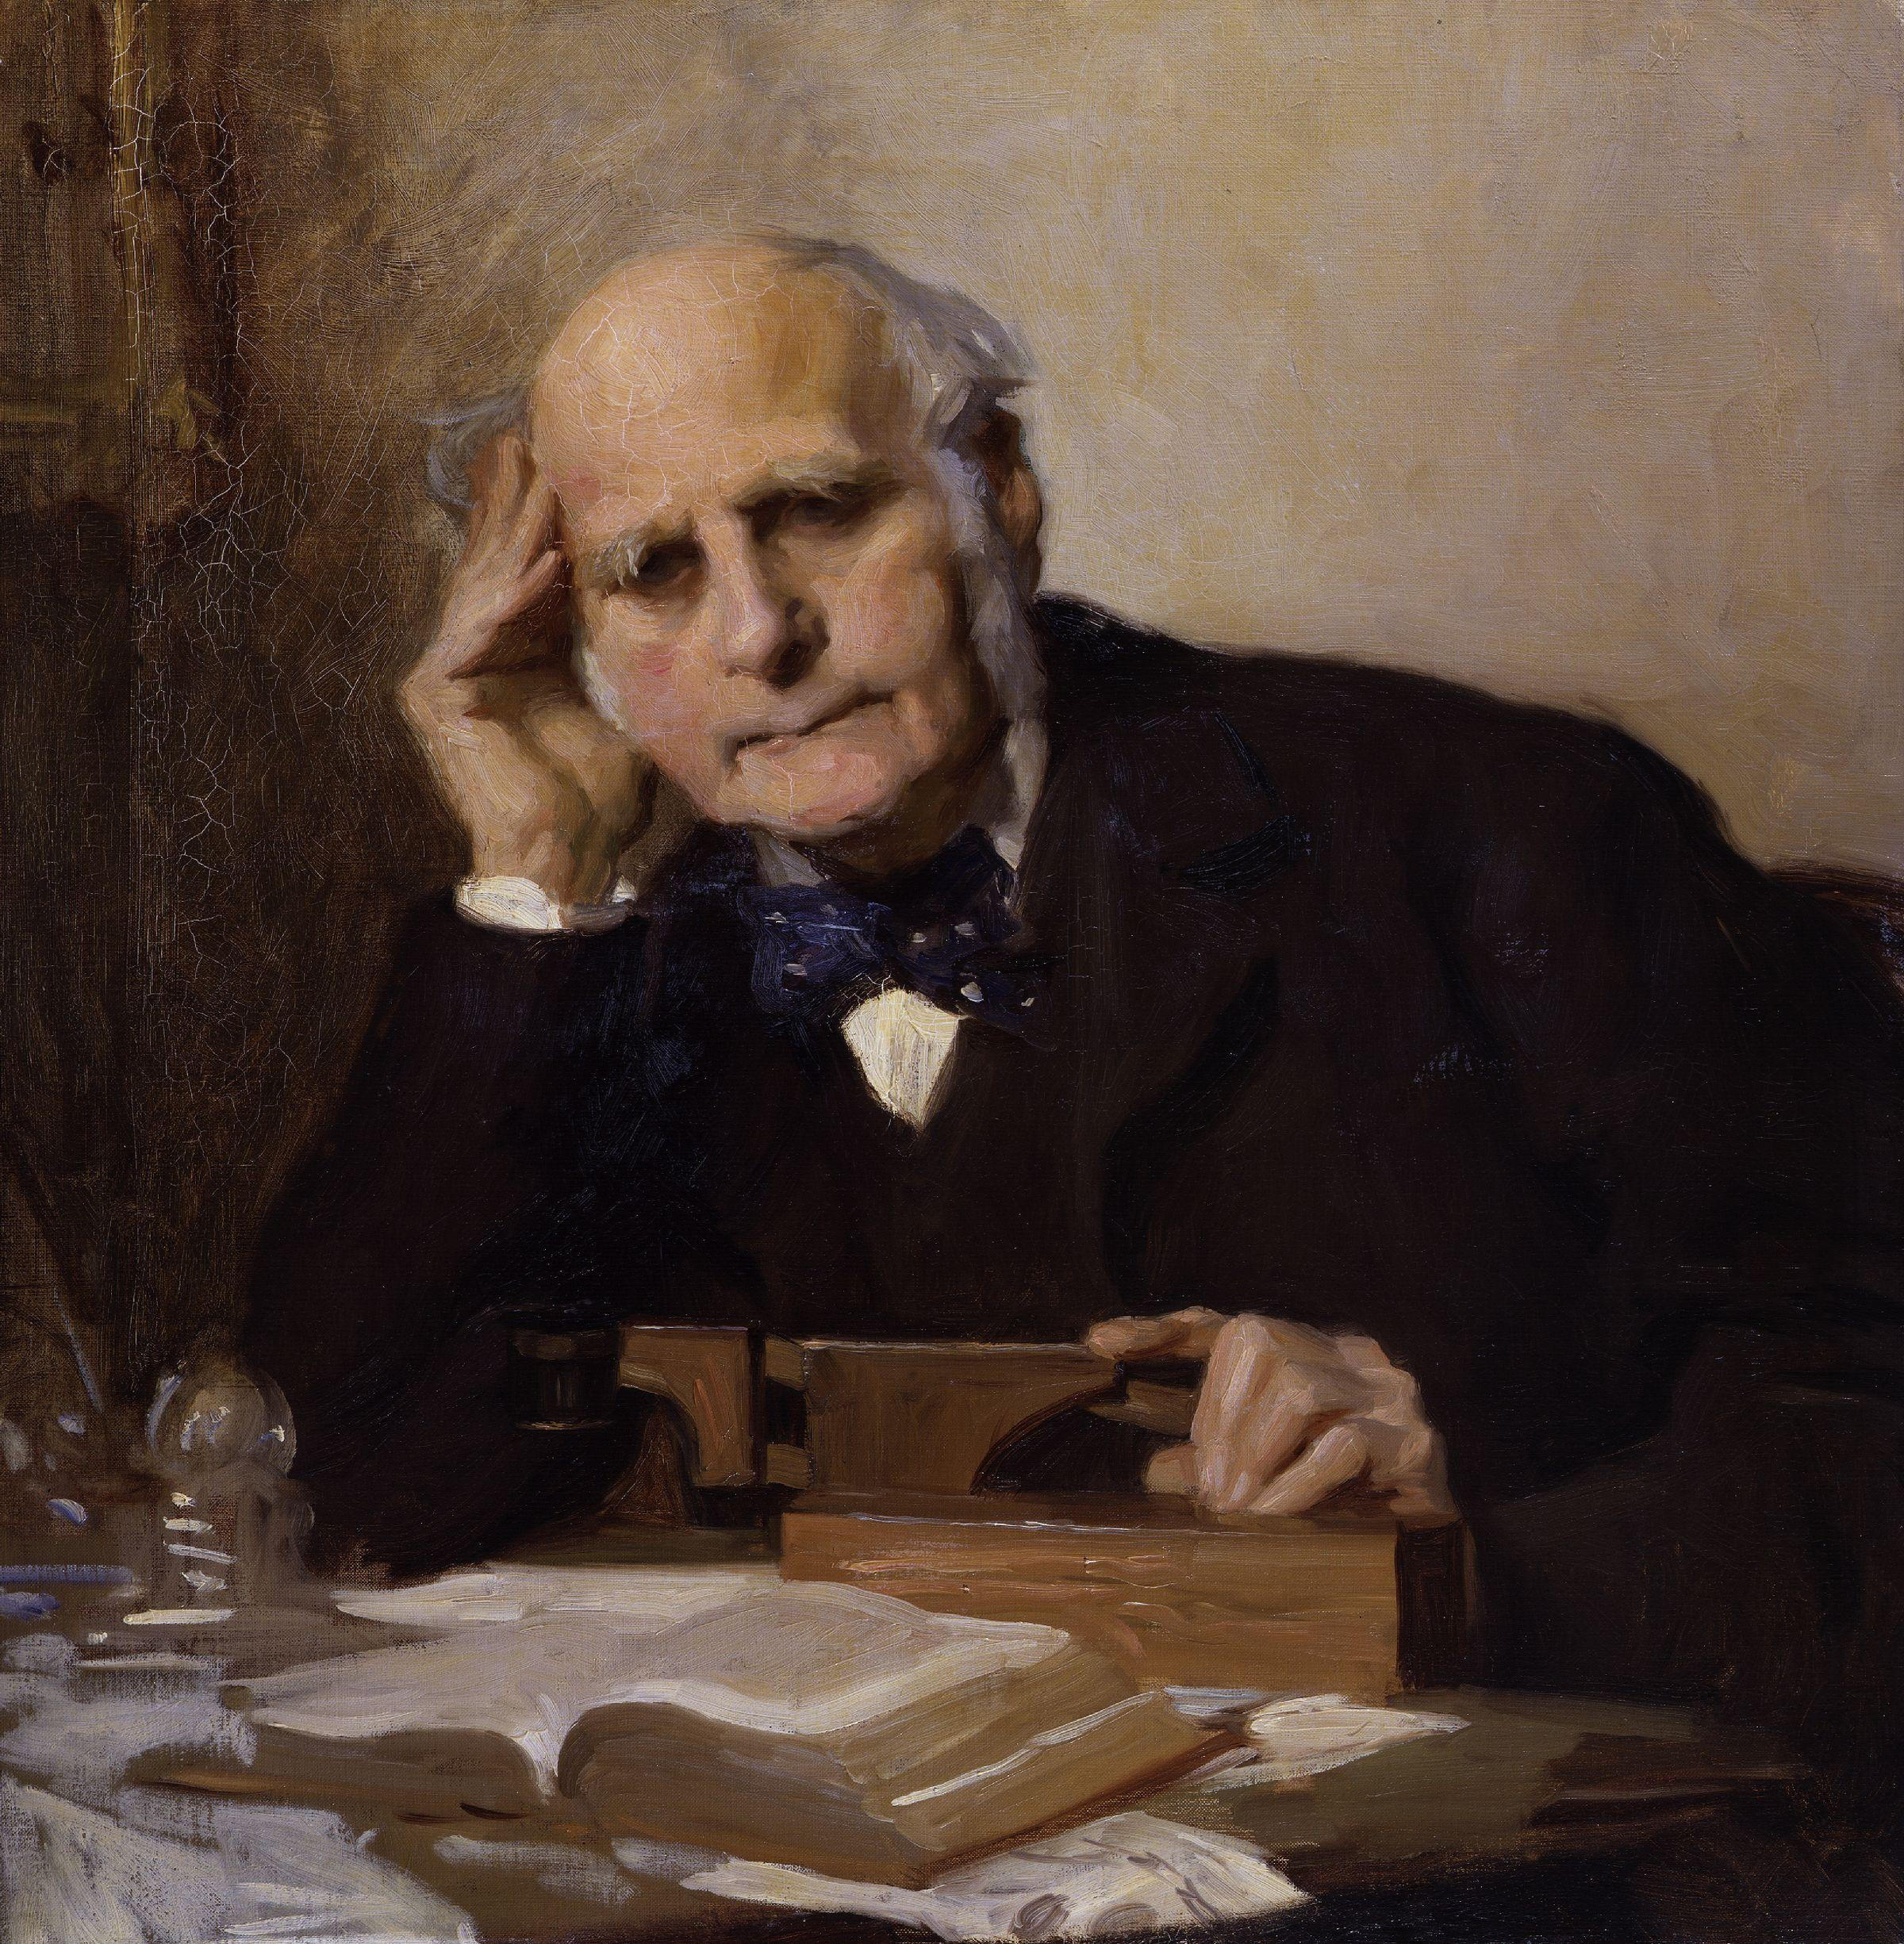

In [5]:
# image credit
sl.hide_code_in_slideshow()
display(Image("images/Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg", width=550))

In [6]:
sl.hide_code_in_slideshow()
HTML(u'<a href="https://commons.wikimedia.org/wiki/File:Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg#/media/File:Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg">Sir Francis Galton by Charles Wellington Furse</a> by Charles Wellington Furse (died 1904) - <a href="//en.wikipedia.org/wiki/National_Portrait_Gallery,_London" class="extiw" title="en:National Portrait Gallery, London">National Portrait Gallery</a>: <a rel="nofollow" class="external text" href="http://www.npg.org.uk/collections/search/portrait.php?search=ap&amp;npgno=3916&amp;eDate=&amp;lDate=">NPG 3916</a>')

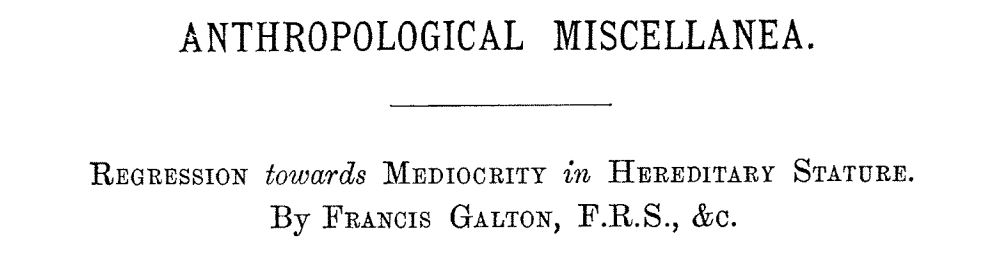

In [7]:
# image credit
sl.hide_code_in_slideshow()
display(Image("images/galton-title.png", width=550))

In 1886 Francis Galton published his observations about how random factors affect outliers.

This notion has come to be called "regression to the mean" because unusually large or small phenomena, after the influence of random events, become closer to their mean values (less extreme).

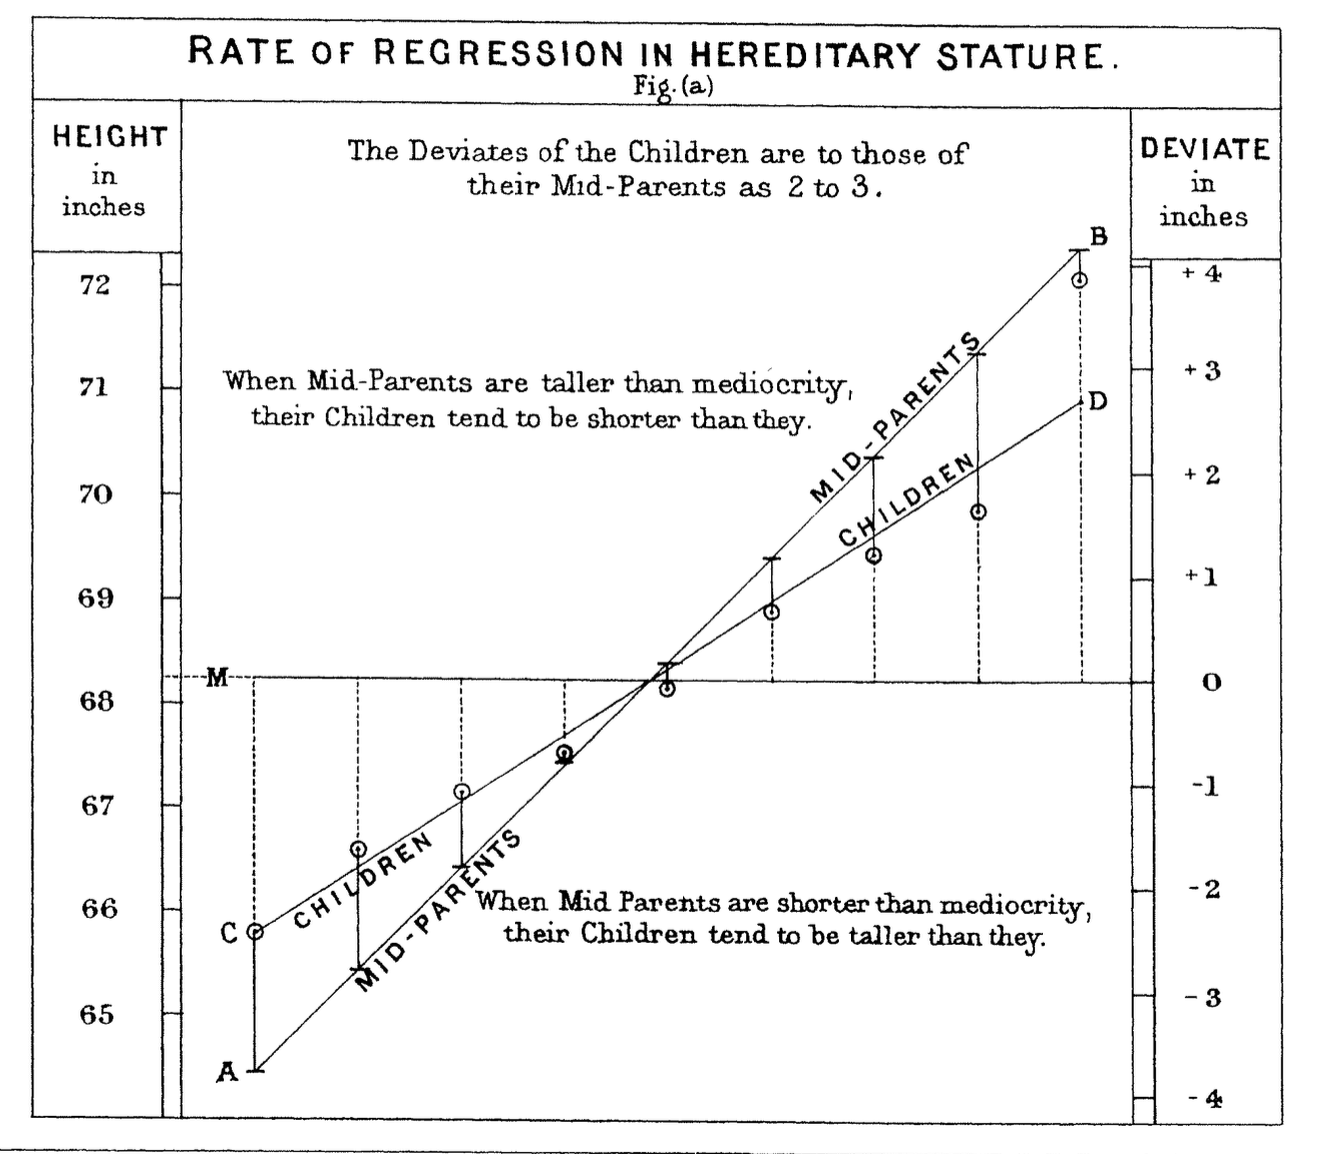

In [8]:
# image credit:
sl.hide_code_in_slideshow()
display(Image("images/galton-regression.png", width=550))

One of the most fundamental kinds of machine learning is the construction of a model that can be used to summarize a set of data.   

The most common form of modeling is __regression__, which means constructing an equation that describes the relationships among variables.

For example, we may look at these points and decide to model them using a line.

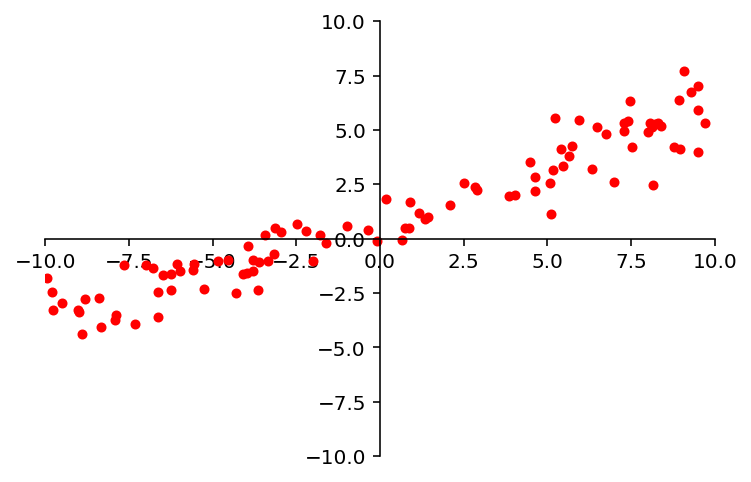

In [9]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
ax.plot(xlin,ylin,'ro',markersize=4)
print('')

We may look at these points and decide to model them using a quadratic function.

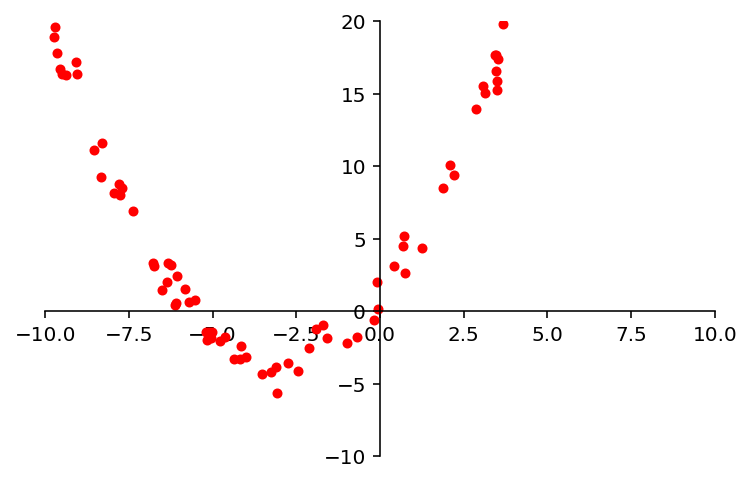

In [10]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,20)
ut.centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0]+(quad[1]*xquad)+(quad[2]*xquad*xquad)+np.random.randn(100)
ax.plot(xquad,yquad,'ro',markersize=4)
print('')

And we may look at these points and decide to model them using a logarithmic function.

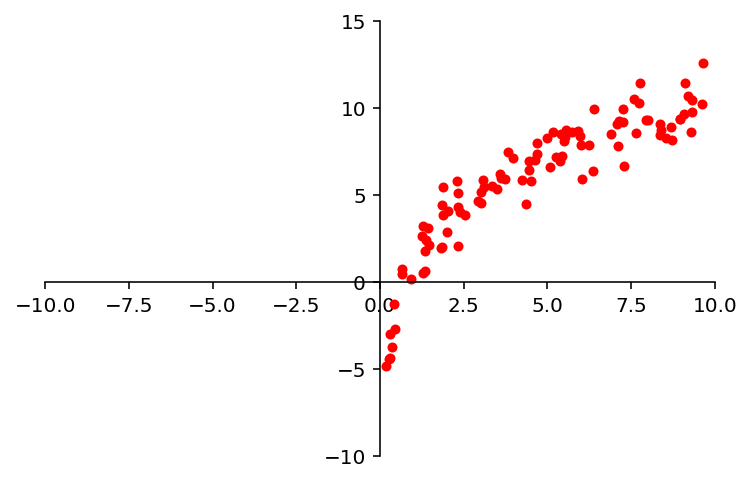

In [11]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,15)
ut.centerAxes(ax)
log = np.array([1, 4])
xlog = 10.0 * np.random.random(100)
ylog = log[0]+log[1]*np.log(xlog)+np.random.randn(100)
ax.plot(xlog,ylog,'ro',markersize=4)
print('')

Clearly, none of these datasets agrees perfectly with the proposed model.   So the question arises:

How do we find the __best__ linear function (or quadratic function, or logarithmic function) given the data?

__Framework.__

This problem has been studied extensively in the field of statistics.   Certain terminology is used:

* Some values are referred to as "independent," and
* Some values are referred to as "dependent."

The basic regression task is: given a set of independent variables and the associated dependent variables, estimate the parameters of a model (such as a line, parabola, etc) that describes how the dependent variables are related to the independent variables.

The dependent variables are collected into a matrix $X,$ which is called the __design matrix.__

The independent variables are collected into an __observation__ vector $\vy.$

The parameters of the model (for any kind of model) are collected into a __parameter__ vector $\beta.$

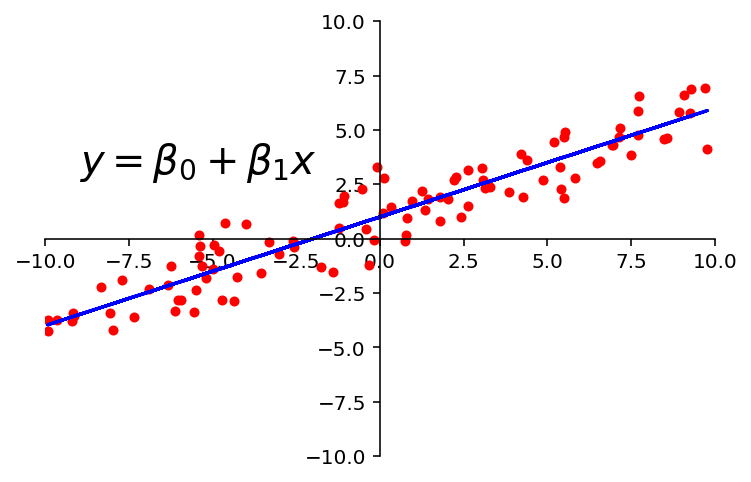

In [12]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
ax.plot(xlin,ylin,'ro',markersize=4)
ax.plot(xlin,line[0]+line[1]*xlin,'b-')
plt.text(-9,3,r'$y = \beta_0 + \beta_1x$',size=20)
print('')

## Least-Squares Lines

The first kind of model we'll study is a linear equation, $y = \beta_0 + \beta_1 x.$

Experimental data often produce points $(x_1, y_1), \dots, (x_n,y_n)$ that seem to lie close to a line.   

We want to determine the parameters $\beta_0, \beta_1$ that define a line that is as "close" to the points as possible.

Suppose we have a line $y = \beta_0 + \beta_1 x$.   For each data point $(x_j, y_j),$ there is a point $(x_j, \beta_0 + \beta_1 x_j)$ that is the point on the line with the same $x$-coordinate.

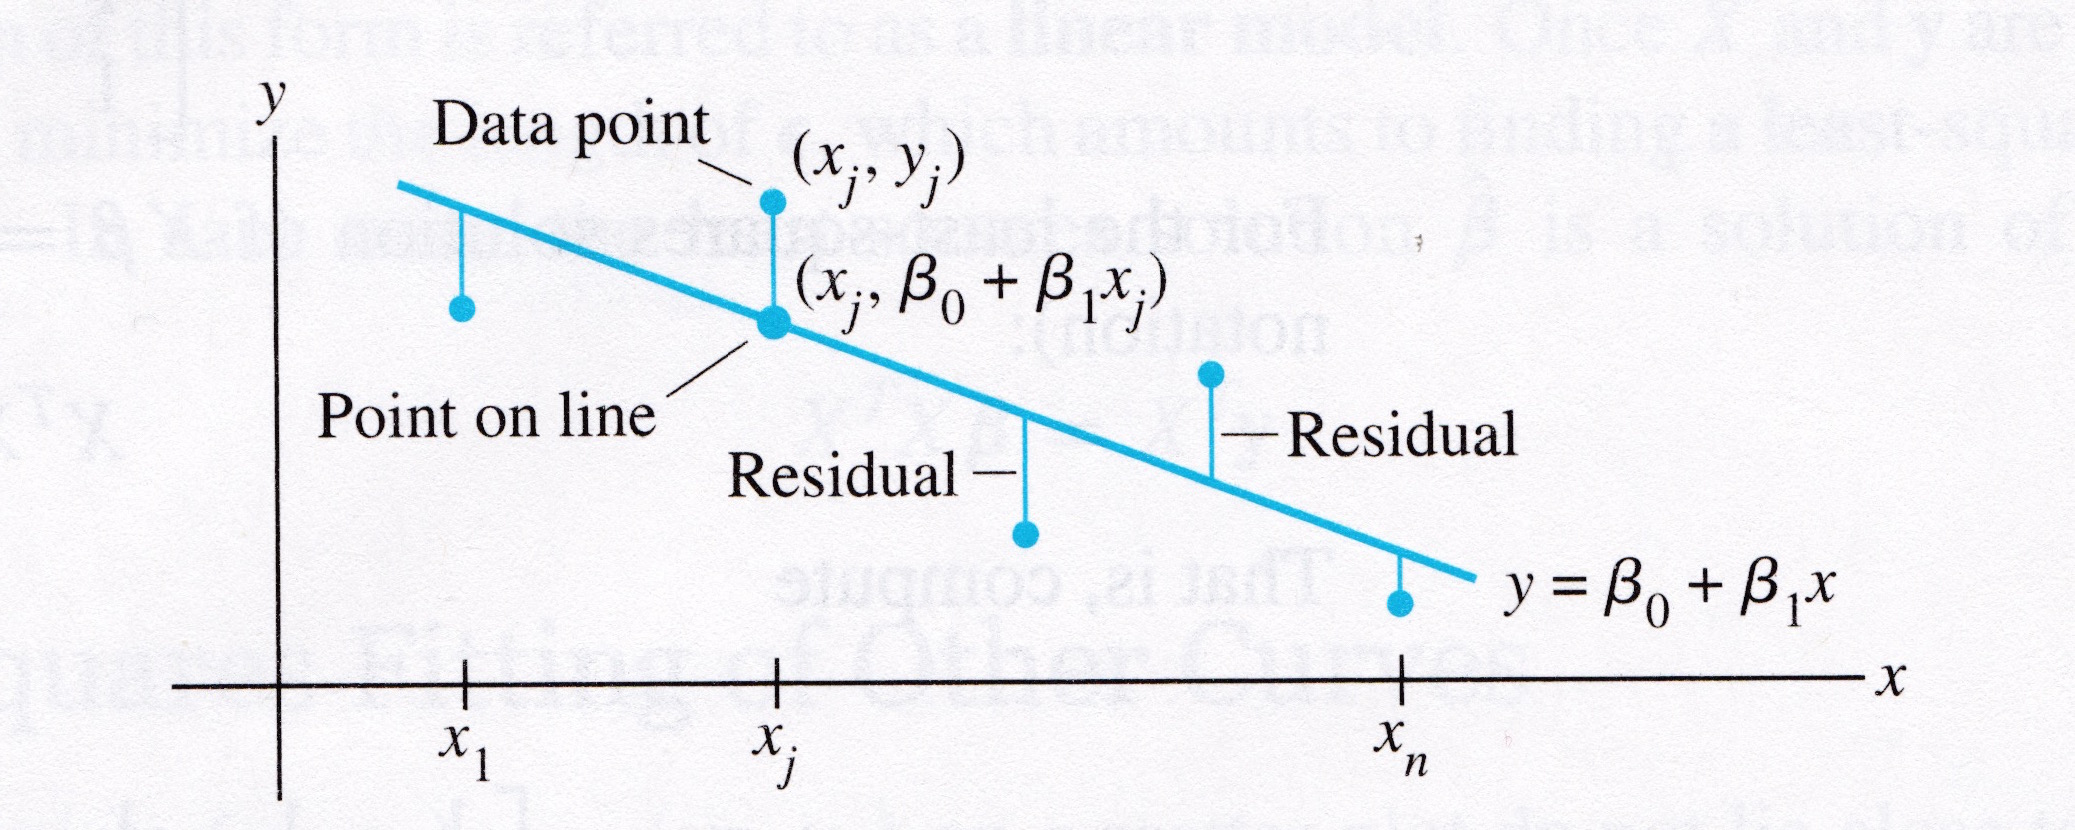

In [13]:
# image credit: Lay, LAA, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-6-6-1.jpg", width=550))

We call $y_j$ the __observed__ value of $y$ and $\beta_0 + \beta_1 x_j$ the __predicted__ $y$-value.   

The difference between an observed $y$-value and a predicted $y$-value is called a __residual__.

There are several ways of measure how "close" the line is to the data. 

The usual choice is to sum the squares of the residuals.  

The __least-squares line__ is the line $y = \beta_0 + \beta_1x$ that minimizes the sum of squares of the residuals. 

The coefficients $\beta_0, \beta_1$ of the line are called __regression coefficients.__

__A least-squares problem.__

If the data points were on the line, the parameters $\beta_0$ and $\beta_1$ would satisfy the equations

$$\beta_0 + \beta_1 x_1 = y_1 $$
$$\beta_0 + \beta_1 x_2 = y_2 $$
$$\beta_0 + \beta_1 x_3 = y_3 $$
$$ \vdots$$
$$\beta_0 + \beta_1 x_n = y_n $$

We can write this system as 

$$X\vbt = \vy,\;\;\;\;\mbox{where}\;X=\mat{{cc}1&x_1\\1&x_2\\\vdots&\vdots\\1&x_n},\;\;\vbt = \mat{{c}\beta_0\\\beta_1},\;\;\vy=\mat{{c}y_1\\y_2\\\vdots\\y_n}$$

Of course, if the data points don't actually lie exactly on a line, 

... then there are no parameters $\beta_0, \beta_1$ for which the predicted $y$-values in $X\vbt$ equal the observed $y$-values in $\vy$, 

... and $X\vbt=\vy$ has no solution.

Note that we are seeking the $\beta$ that minimizes the sum of squared residuals, ie,

$$\sum_i (\beta_0 + \beta_1 x_i - y_i)^2$$

$$=\Vert X\beta -\vy\Vert^2$$

This is key: __the sum of squares of the residuals__ is __exactly__ the __square of the distance between the vectors $X\vbt$ and $\vy.$__

This is a least-squares problem, $A\vx = \vb,$ with different notation.

_Computing the least-squares solution of $X\vbt = \vy$ is equivalent to finding the $\vbt$ that determines the least-squares line._

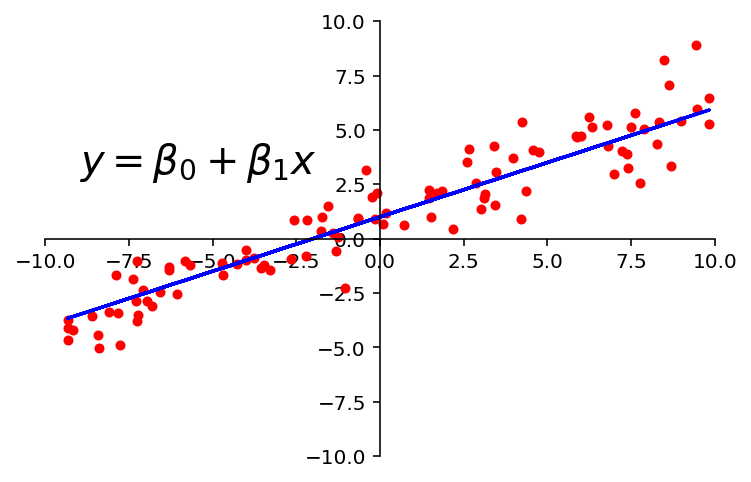

In [14]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
ax.plot(xlin,ylin,'ro',markersize=4)
ax.plot(xlin,line[0]+line[1]*xlin,'b-')
plt.text(-9,3,r'$y = \beta_0 + \beta_1x$',size=20)
print('')

## Question Time!  Q23.1

__Example 1.__  Find the equation $y = \beta_0 + \beta_1 x$ of the least-squares line that best fits the data points (2,1), (5,2), (7,3), and (8,3).

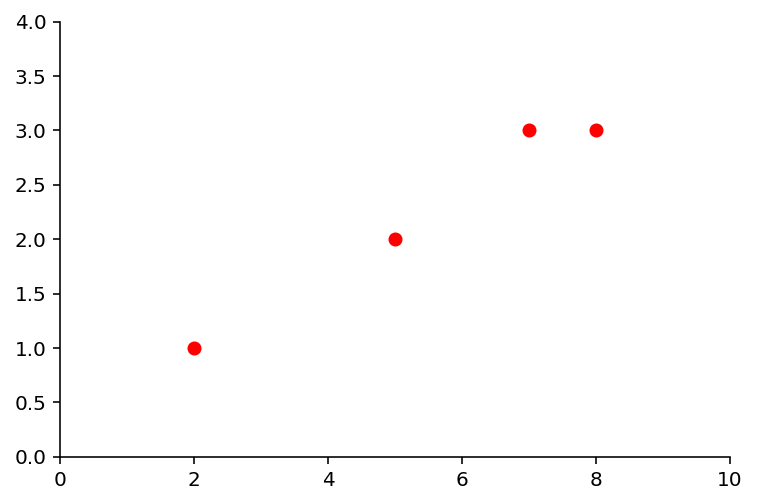

In [15]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(0,10,0,4)
ut.centerAxes(ax)
pts = np.array([[2,1],[5,2],[7,3],[8,3]]).T
ax.plot(pts[0],pts[1],'ro')
# plt.text(-9,3,r'$y = \beta_0 + \beta_1x$',size=20)
print('')

__Solution.__ Use the $x$-coordinates of the data to build the design matrix $X$, and the $y$-coordinates to build the observation vector $\vy$:

$$X = \mat{{cc}1&2\\1&5\\1&7\\1&8},\;\;\;\vy=\mat{{c}1\\2\\3\\3}$$

Now, to obtain the least-squares line, find the least-squares solution to $X\vbt = \vy.$

We do this via the method we learned last lecture (just with new notation):

$$X^TX\vbt = X^T\vy$$

So, we compute:
    
$$X^TX = \mat{{cccc}1&1&1&1\\2&5&7&8}\mat{{cc}1&2\\1&5\\1&7\\1&8} = \mat{{rr}4&22\\22&142}$$

$$X^T\vy =  \mat{{cccc}1&1&1&1\\2&5&7&8}\mat{{c}1\\2\\3\\3} = \mat{{rr}9\\57}$$

So the normal equations are:
    
$$\mat{{rr}4&22\\22&142}\mat{{c}\beta_0\\\beta_1} = \mat{{rr}9\\57}$$

Solving, we get:
    
$$\mat{{c}\beta_0\\\beta_1}=\mat{{rr}4&22\\22&142}^{-1}\mat{{rr}9\\57}$$

$$ = \frac{1}{84}\mat{{rr}142&-22\\-22&4}\mat{{rr}9\\57}$$

$$ = \mat{{c}2/7\\5/14}$$

So the least-squares line has the equation

$$y = \frac{2}{7} + \frac{5}{14}x.$$

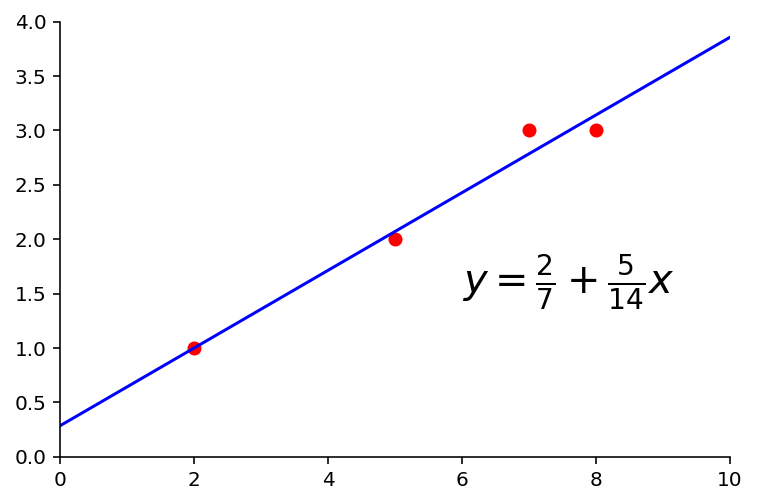

In [16]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(0,10,0,4)
ut.centerAxes(ax)
pts = np.array([[2,1],[5,2],[7,3],[8,3]]).T
ax.plot(pts[0],pts[1],'ro')
ut.plotLinEqn(-5./14, 1, 2./7,color='b')
plt.text(6,1.5,r'$y = \frac{2}{7} + \frac{5}{14}x$',size=20)
print('')

## The General Linear Model

Another way that the inconsistent linear system is often written is to collect all the residuals into a __residual vector.__ 

Then an exact equation is

$$y = X\vbt + {\mathbf\epsilon}$$

Any equation of this form is referred to as a __linear model.__ 

In this formulation, the goal is to minimize the length of $\epsilon$, ie, $\Vert\epsilon\Vert.$

In some cases, one would like to fit data points with something other than a straight line.  

For example, think of Gauss trying to find the equation for the orbit of Ceres.

In cases like this, the matrix equation is still $X\vbt = \vy$, but the specific form of $X$ changes from one problem to the next.

The least-squares solution $\hat{\vbt}$ is a solution of the normal equations

$$X^TX\vbt = X^T\vy.$$

## Least-Squares Fitting of Other Models

Most models have parameters, and the objection of __model fitting__ is to to fix those parameters.   Let's talk about model parameters.

In model fitting, the parameters are the unknown.  A central question for us is whether the model is _linear_ in its parameters.

For example, the model $y = \beta_0 e^{-\beta_1 x}$ is __not__ linear in its parameters.  The model $y = \beta_0 e^{-2 x}$ __is__ linear in its parameters.

For a model that is linear in its parameters, an observation is a linear combination of (arbitrary) known functions.

In other words, a model that is linear in its parameters is

$$y = \beta_0f_0(x) + \beta_1f_1(x) + \dots + \beta_nf_n(x)$$

where $f_0, \dots, f_n$ are known functions and $\beta_0,\dots,\beta_k$ are parameters.

__Example.__  Suppose data points $(x_1, y_1), \dots, (x_n, y_n)$ appear to lie along some sort of parabola instead of a straight line.  Suppose we wish to approximate the data by an equation of the form

$$y = \beta_0 + \beta_1x + \beta_2x^2.$$

Describe the linear model that produces a "least squares fit" of the data by the equation.

__Solution.__  The ideal relationship is $y = \beta_0 + \beta_1x + \beta_2x^2.$

Suppose the actual values of the parameters are $\beta_0, \beta_1, \beta_2.$  Then the coordinates of the first data point satisfy the equation

$$y_1 = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \epsilon_1$$

where $\epsilon_1$ is the residual error between the observed value $y_1$ and the predicted $y$-value.

Each data point determines a similar equation:

$$y_1 = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \epsilon_1$$
$$y_2 = \beta_0 + \beta_1x_2 + \beta_2x_2^2 + \epsilon_2$$
$$\vdots$$
$$y_n = \beta_0 + \beta_1x_n + \beta_2x_n^2 + \epsilon_n$$

Clearly, this system can be written as $\vy = X\vbt + \mathbf{\epsilon}.$

$$\mat{{c}y_1\\y_2\\\vdots\\y_n} = \mat{{ccc}1&x_1&x_1^2\\1&x_2&x_2^2\\\vdots&\vdots&\vdots\\1&x_n&x_n^2} \mat{{ccc}\beta_0\\\beta_1\\\beta_2} + \mat{{c}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n}$$

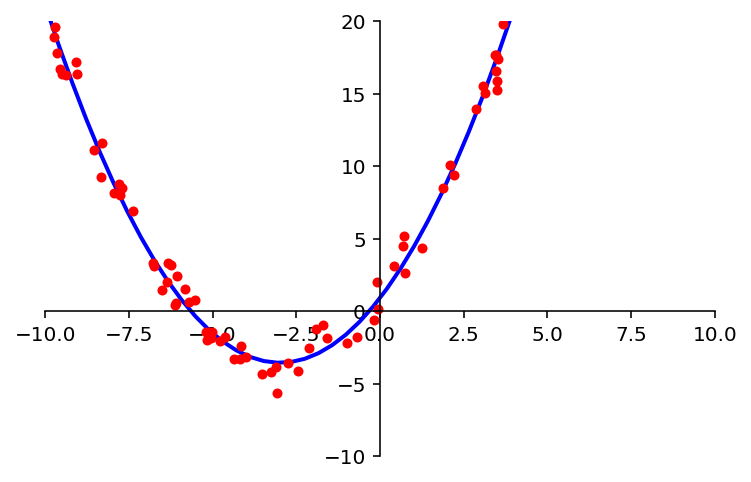

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import laUtilities as ut
#
# Input data are in the vectors xquad and yquad
#
# estimate the parameters of the linear model
#
m = np.shape(xquad)[0]
X = np.array([np.ones(m),xquad,xquad**2]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yquad)
#
# plot the results
#
ax = ut.plotSetup(-10,10,-10,20)
ut.centerAxes(ax)
xplot = np.linspace(-10,10,50)
yestplot = beta[0]+beta[1]*xplot+beta[2]*xplot**2
ax.plot(xplot,yestplot,'b-',lw=2)
ax.plot(xquad,yquad,'ro',markersize=4)
print('')

/Users/markcrovella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


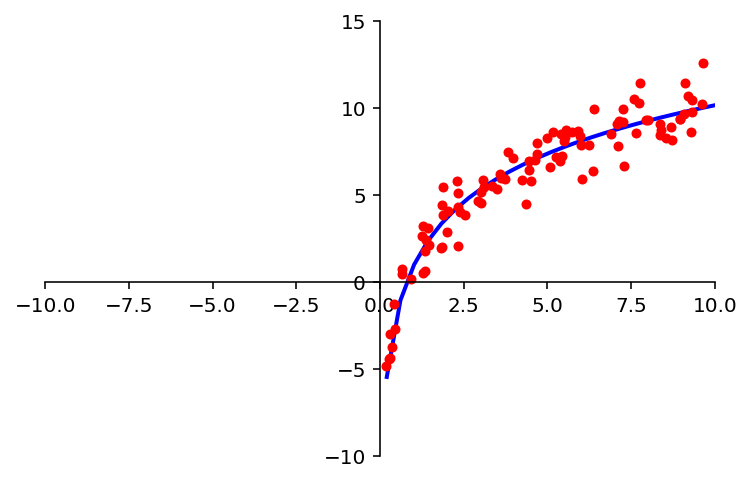

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import laUtilities as ut
#
# Input data are in the vectors xlog and ylog
#
# estimate the parameters of the linear model
#
m = np.shape(xlog)[0]
X = np.array([np.ones(m),np.log(xlog)]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ylog)
# 
# plot the results
#
ax = ut.plotSetup(-10,10,-10,15)
ut.centerAxes(ax)
xplot = np.linspace(-10,10,50)
yestplot = beta[0]+beta[1]*np.log(xplot)
ax.plot(xplot,yestplot,'b-',lw=2)
ax.plot(xlog,ylog,'ro',markersize=4)
print('')

## Question Time!  Q23.2

## Multiple Regression

Suppose an experiment involves two independent variables -- say, $u$ and $v$, -- and one dependent variable, $y$.  A simple equation for predicting $y$ from $u$ and $v$ has the form

$$y = \beta_0 + \beta_1 u + \beta_2 v$$

Since there is more than one independent variable, this is called __multiple regression.__

A more general prediction equation might have the form

$$y = \beta_0 + \beta_1 u + \beta_2 v + \beta_3u^2 + \beta_4 uv + \beta_5 v^2$$

A least squares fit to equations like this is called a __trend surface.__

In general, a linear model will arise whenever $y$ is to be predicted by an equation of the form

$$y = \beta_0f_0(u,v) + \beta_1f_1(u,v) + \cdots + \beta_kf_k(u,v)$$

with $f_0,\dots,f_k$ any sort of known functions and $\beta_0,...,\beta_k$ unknown weights.

Let's take an example.   Here are a set of points in $\R^3$:

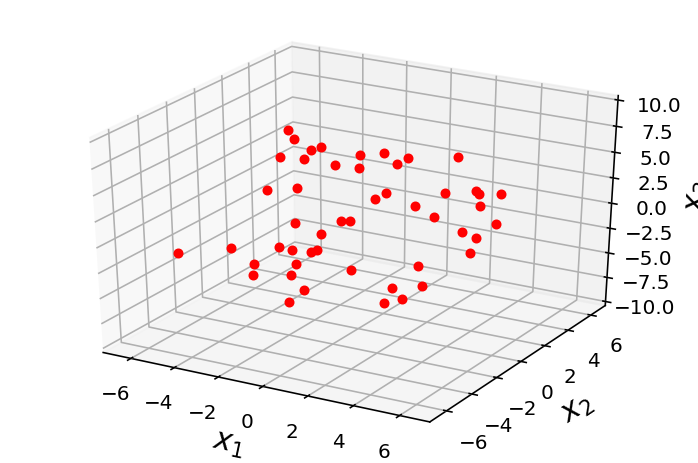

In [19]:
# %matplotlib qt
%matplotlib inline
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-7,7,-7,7,-10,10)
v = [4.0,4.0,2.0]
u = [-4.0,3.0,1.0]
# plotting the span of v
# ut.plotSpan3d(ax,u,v,'Green')
npts = 50
# set locations of points that fall within x,y
xc = -7.0 + 14.0 * np.random.random(npts)
yc = -7.0 + 14.0 * np.random.random(npts)
A = np.array([u,v]).T
# project these points onto the plane
P = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T)
coords = P.dot(np.array([xc,yc,np.zeros(npts)]))
coords[2] += np.random.randn(npts)
ax.plot(coords[0],coords[1],'ro',zs=coords[2],markersize=4)
print('')

__Example.__  In geography, local models of terrain are constructed from data $(u_1, v_1, y_1), \dots, (u_n, v_n, y_n)$ where $u_j, v_j$, and $y_j$ are latitude, longitude, and altitude, respectively.

Let's describe the linear models that gives a least-squares fit to such data.  The solution is called the least-squares _plane._

__Solution.__  We expect the data to satisfy these equations:

$$y_1 = \beta_0 + \beta_1 u_1 + \beta_2 v_1 + \epsilon_1$$
$$y_1 = \beta_0 + \beta_1 u_2 + \beta_2 v_2 + \epsilon_2$$
$$\vdots$$
$$y_1 = \beta_0 + \beta_1 u_n + \beta_2 v_n + \epsilon_n$$

This system has the matrix for $\vy = X\vbt + \epsilon,$ where

$$\vy = \mat{{c}y_1\\y_1\\\vdots\\y_n},\;\;X = \mat{{ccc}1&u_1&v_1\\1&u_2&v_2\\\vdots&\vdots&\vdots\\1&u_n&v_n},\;\;\vbt=\mat{{c}\beta_0\\\beta_1\\\beta_2},\;\;\epsilon = \mat{{c}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n}$$

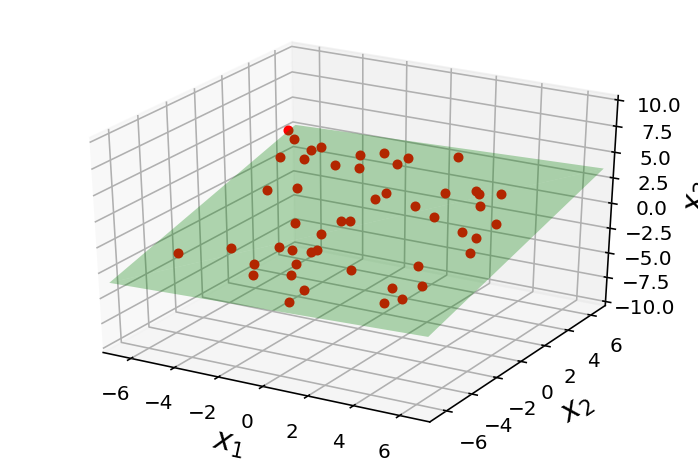

In [20]:
%matplotlib inline
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-7,7,-7,7,-10,10)
v = [4.0,4.0,2.0]
u = [-4.0,3.0,1.0]
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
npts = 50
# set locations of points that fall within x,y
# xc = -7.0 + 14.0 * np.random.random(npts)
# yc = -7.0 + 14.0 * np.random.random(npts)
# A = np.array([u,v]).T
# project these points onto the plane
# P = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T)
# coords = P.dot(np.array([xc,yc,np.zeros(npts)]))
# coords[2] += np.random.randn(npts)
ax.plot(coords[0],coords[1],'ro',zs=coords[2],markersize=4)
# plt.show()
print('')

This example shows that the linear model for multiple regression has the same abstract form as the model for the simple regression in the earlier examples.

We can see that there the general principle is the same across all the different kinds of linear models.

Once $X$ is defined properly, the normal equations for $\vbt$ have the same matrix form, no matter how many variables are involved.

Thus, for any linear model where $X^TX$ is invertible, the least squares $\hat{\vbt}$ is given by $(X^TX)^{-1}X^T\vy$.